<a href="https://colab.research.google.com/github/praffs18/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Mohammed Yahya Ansari
##### **Team Member 2 -** Prafull Korde

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Github Repository - https://github.com/praffs18/Bike-Sharing-Demand-Prediction

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [187]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt


# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import warnings
import warnings
warnings.filterwarnings('ignore')
     

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBRegressor

from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

import xgboost as xgb

from prettytable import PrettyTable

### Dataset Loading

In [188]:
# Load Dataset from github repository
url = 'https://raw.githubusercontent.com/praffs18/Bike-Sharing-Demand-Prediction/main/SeoulBikeData.csv'
data = pd.read_csv(url, encoding='unicode_escape')

### Dataset First View

In [189]:
# View top 5 rows of the dataset
data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [190]:
# View last 5 rows of the dataset
data.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [191]:
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",data.shape[0])
print("Number of columns are: ",data.shape[1])

Number of rows are:  8760
Number of columns are:  14


### Dataset Information

In [192]:
# Checking information about the dataset using info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [193]:
# Checking duplicated rows count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [194]:
# Checking missing values/null values count for each column
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

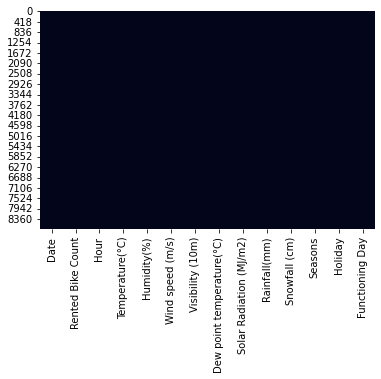

In [195]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(data.isnull(), cbar=False)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [196]:
# Dataset Columns
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [197]:
# Dataset Describe (all columns included)
data.describe(include= 'all').round(2)

Date  Rented Bike Count     Hour  Temperature(°C)  Humidity(%)  \
count         8760            8760.00  8760.00          8760.00      8760.00   
unique         365                NaN      NaN              NaN          NaN   
top     01/12/2017                NaN      NaN              NaN          NaN   
freq            24                NaN      NaN              NaN          NaN   
mean           NaN             704.60    11.50            12.88        58.23   
std            NaN             645.00     6.92            11.94        20.36   
min            NaN               0.00     0.00           -17.80         0.00   
25%            NaN             191.00     5.75             3.50        42.00   
50%            NaN             504.50    11.50            13.70        57.00   
75%            NaN            1065.25    17.25            22.50        74.00   
max            NaN            3556.00    23.00            39.40        98.00   

        Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count            8760.00           8760.00                    8760.00   
unique               NaN               NaN                        NaN   
top                  NaN               NaN                        NaN   
freq                 NaN               NaN                        NaN   
mean                1.72           1436.83                       4.07   
std                 1.04            608.30                      13.06   
min                 0.00             27.00                     -30.60   
25%                 0.90            940.00                      -4.70   
50%                 1.50           1698.00                       5.10   
75%                 2.30           2000.00                      14.80   
max                 7.40           2000.00                      27.20   

        Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
count                   8760.00       8760.00        8760.00    8760   
unique                      NaN           NaN            NaN       4   
top                         NaN           NaN            NaN  Spring   
freq                        NaN           NaN            NaN    2208   
mean                       0.57          0.15           0.08     NaN   
std                        0.87          1.13           0.44     NaN   
min                        0.00          0.00           0.00     NaN   
25%                        0.00          0.00           0.00     NaN   
50%                        0.01          0.00           0.00     NaN   
75%                        0.93          0.00           0.00     NaN   
max                        3.52         35.00           8.80     NaN   

           Holiday Functioning Day  
count         8760            8760  
unique           2               2  
top     No Holiday             Yes  
freq          8328            8465  
mean           NaN             NaN  
std            NaN             NaN  
min            NaN             NaN  
25%            NaN             NaN  
50%            NaN             NaN  
75%            NaN             NaN  
max            NaN             NaN

### Variables Description 

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


<b>Attribute Information: </b>

* Date : year-month-day
* Rented Bike count - Count of bikes rented at each hour
* Hour - Hour of he day
* Temperature-Temperature in Celsius
* Humidity - %
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - Celsius
* Solar radiation - MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
* Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)Answer Here

### Check Unique Values for each variable.

In [198]:
# Check Unique Values for each variable using a for loop
for i in data.columns.tolist():
  print("No. of unique values in",i,"is",data[i].nunique())

No. of unique values in Date is 365
No. of unique values in Rented Bike Count is 2166
No. of unique values in Hour is 24
No. of unique values in Temperature(°C) is 546
No. of unique values in Humidity(%) is 90
No. of unique values in Wind speed (m/s) is 65
No. of unique values in Visibility (10m) is 1789
No. of unique values in Dew point temperature(°C) is 556
No. of unique values in Solar Radiation (MJ/m2) is 345
No. of unique values in Rainfall(mm) is 61
No. of unique values in Snowfall (cm) is 51
No. of unique values in Seasons is 4
No. of unique values in Holiday is 2
No. of unique values in Functioning Day is 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [199]:
# Before doing any data wrangling lets create copy of the dataset
data_2 = data.copy()

In [200]:
# Renaming the columns
data_2.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temperature', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'},
          inplace=True)

In [201]:
data_2.columns

Index(['date', 'rented_bike_count', 'hour', 'temperature', 'humidity',
       'wind_speed', 'visibility', 'dew_point_temp', 'solar_radiation',
       'rainfall', 'snowfall', 'seasons', 'holiday', 'func_day'],
      dtype='object')

In [202]:
# converting date variable in to datetime datatype
data_2['date'] = data_2['date'].apply(lambda x: dt.strptime(x,'%d/%m/%Y'))

In [203]:
# Creating new columns for day and month
data_2['month'] = data_2['date'].apply(lambda x : x.month)
data_2['day_of_week'] = data_2['date'].apply(lambda x : x.isoweekday())

In [204]:
# engineering new feature 'weekend' from day_of_week
data_2['weekend'] = data_2['day_of_week'].apply(lambda x: 1 if x>5 else 0)

In [205]:
data_2.describe(include='all').round(2)

date  rented_bike_count     hour  temperature  \
count                  8760            8760.00  8760.00      8760.00   
unique                  365                NaN      NaN          NaN   
top     2017-12-01 00:00:00                NaN      NaN          NaN   
freq                     24                NaN      NaN          NaN   
first   2017-12-01 00:00:00                NaN      NaN          NaN   
last    2018-11-30 00:00:00                NaN      NaN          NaN   
mean                    NaN             704.60    11.50        12.88   
std                     NaN             645.00     6.92        11.94   
min                     NaN               0.00     0.00       -17.80   
25%                     NaN             191.00     5.75         3.50   
50%                     NaN             504.50    11.50        13.70   
75%                     NaN            1065.25    17.25        22.50   
max                     NaN            3556.00    23.00        39.40   

        humidity  wind_speed  visibility  dew_point_temp  solar_radiation  \
count    8760.00     8760.00     8760.00         8760.00          8760.00   
unique       NaN         NaN         NaN             NaN              NaN   
top          NaN         NaN         NaN             NaN              NaN   
freq         NaN         NaN         NaN             NaN              NaN   
first        NaN         NaN         NaN             NaN              NaN   
last         NaN         NaN         NaN             NaN              NaN   
mean       58.23        1.72     1436.83            4.07             0.57   
std        20.36        1.04      608.30           13.06             0.87   
min         0.00        0.00       27.00          -30.60             0.00   
25%        42.00        0.90      940.00           -4.70             0.00   
50%        57.00        1.50     1698.00            5.10             0.01   
75%        74.00        2.30     2000.00           14.80             0.93   
max        98.00        7.40     2000.00           27.20             3.52   

        rainfall  snowfall seasons     holiday func_day    month  day_of_week  \
count    8760.00   8760.00    8760        8760     8760  8760.00       8760.0   
unique       NaN       NaN       4           2        2      NaN          NaN   
top          NaN       NaN  Spring  No Holiday      Yes      NaN          NaN   
freq         NaN       NaN    2208        8328     8465      NaN          NaN   
first        NaN       NaN     NaN         NaN      NaN      NaN          NaN   
last         NaN       NaN     NaN         NaN      NaN      NaN          NaN   
mean        0.15      0.08     NaN         NaN      NaN     6.53          4.0   
std         1.13      0.44     NaN         NaN      NaN     3.45          2.0   
min         0.00      0.00     NaN         NaN      NaN     1.00          1.0   
25%         0.00      0.00     NaN         NaN      NaN     4.00          2.0   
50%         0.00      0.00     NaN         NaN      NaN     7.00          4.0   
75%         0.00      0.00     NaN         NaN      NaN    10.00          6.0   
max        35.00      8.80     NaN         NaN      NaN    12.00          7.0   

        weekend  
count   8760.00  
unique      NaN  
top         NaN  
freq        NaN  
first       NaN  
last        NaN  
mean       0.28  
std        0.45  
min        0.00  
25%        0.00  
50%        0.00  
75%        1.00  
max        1.00

In [206]:
#defining continuous independent variables separately
cont_var = ['temperature', 'humidity', 'wind_speed', 'visibility', 'solar_radiation', 'rainfall', 'snowfall']

In [207]:
# Defining dependent variable
dependent_variable = ['rented_bike_count']

In [208]:
# defining categorical independent variables separately
cat_var = ['hour','seasons', 'holiday', 'func_day', 'month', 'day_of_week', 'weekend']

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

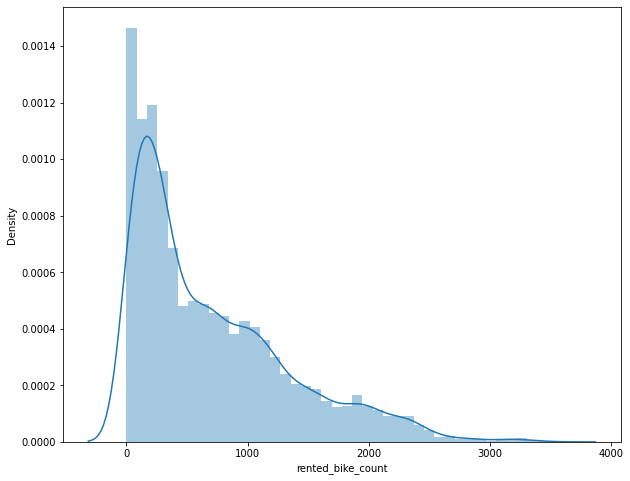

In [209]:
# Chart-1 Visualization code for distribution of target variable
plt.figure(figsize=(10,8))
sns.distplot(data_2['rented_bike_count'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

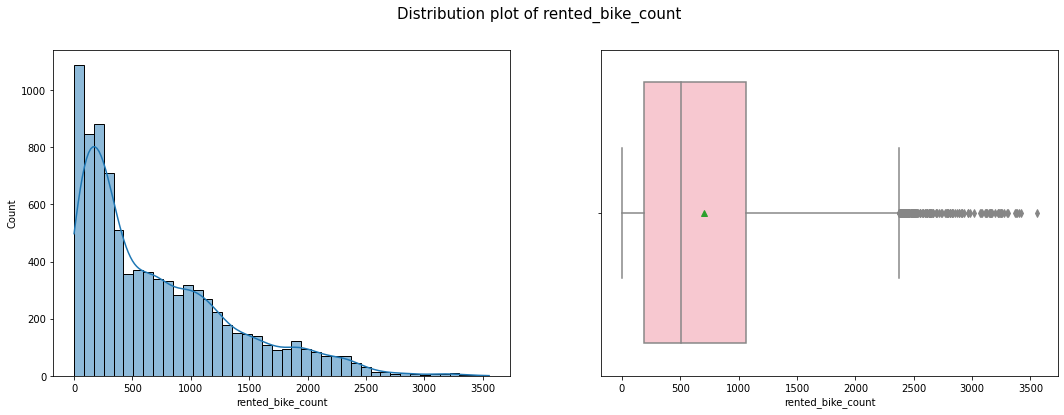

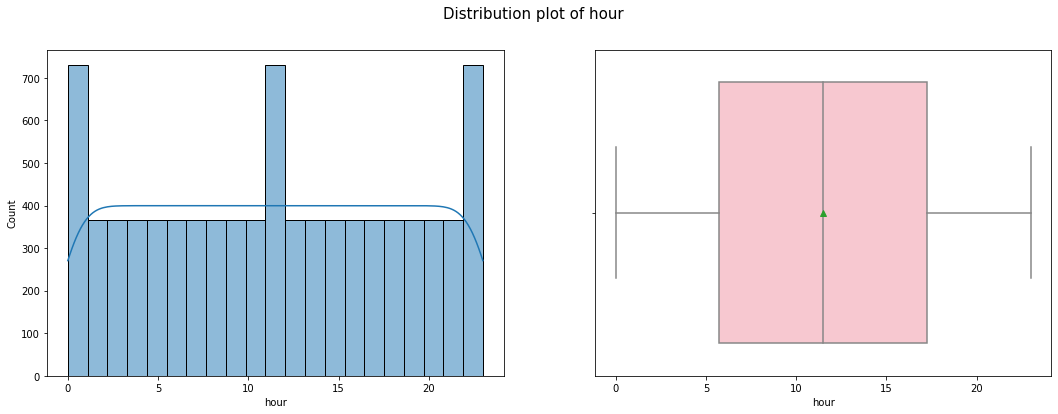

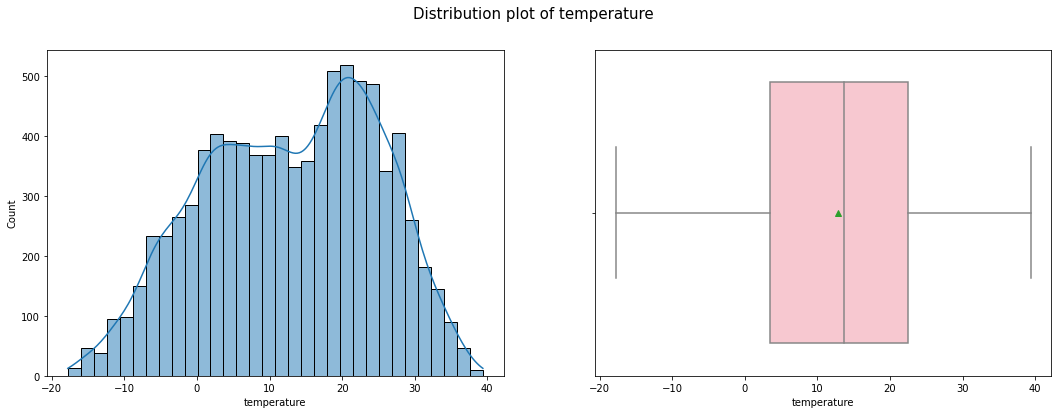

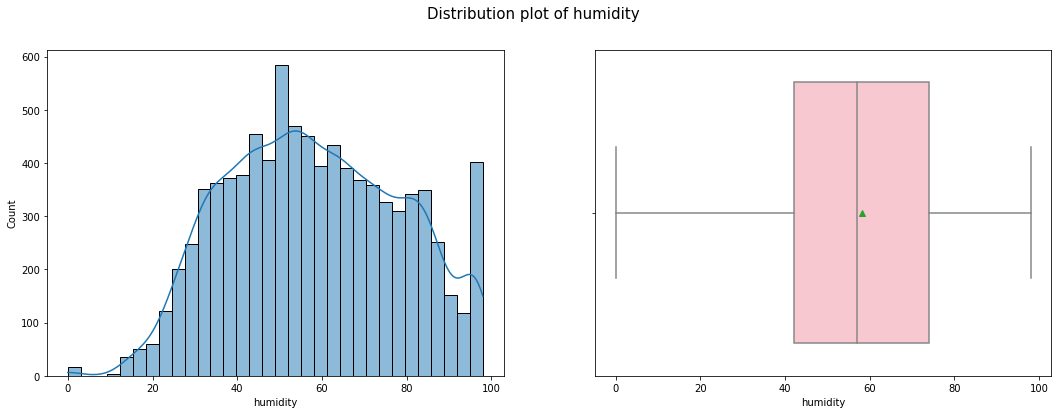

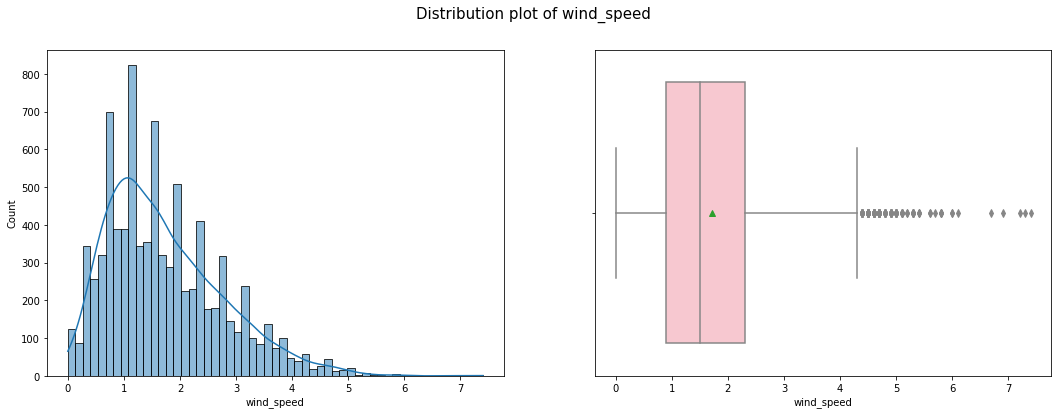

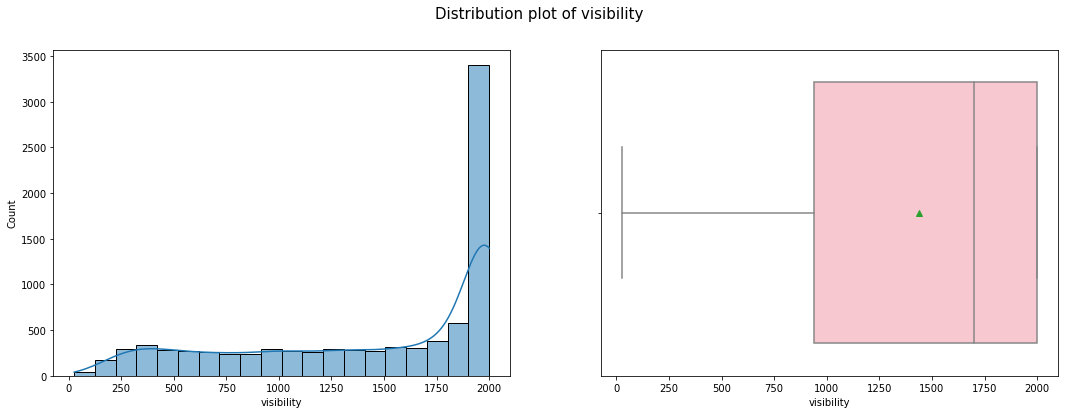

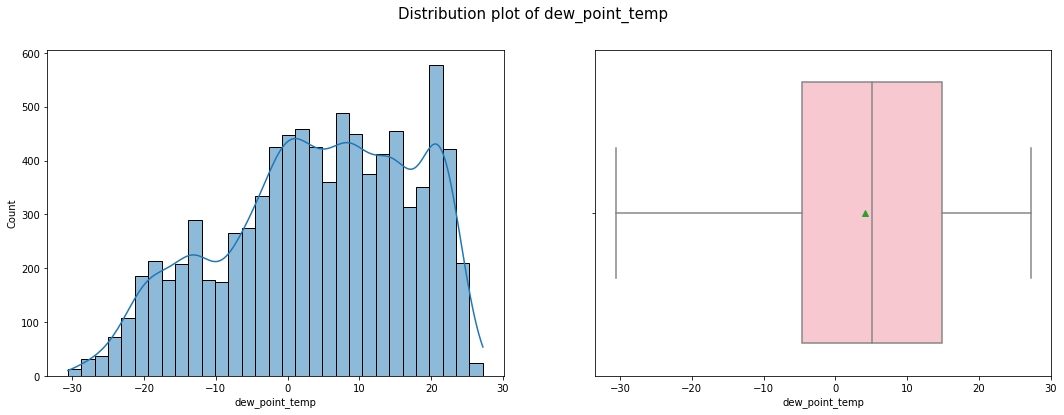

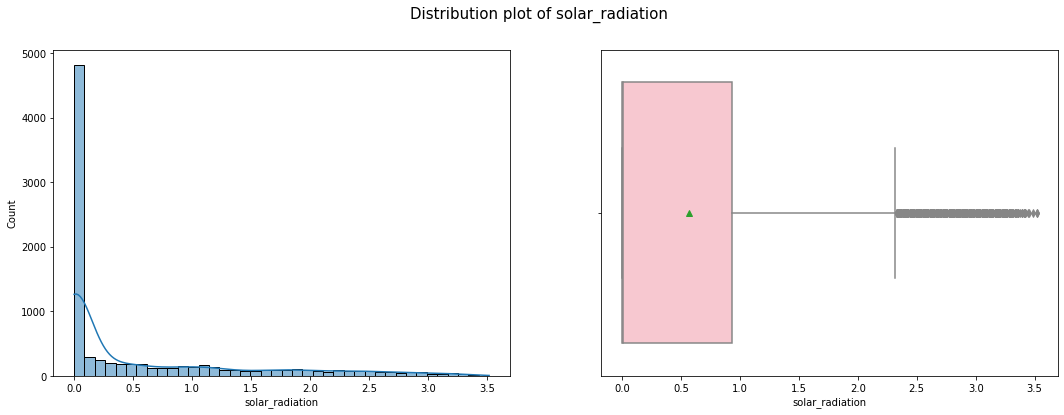

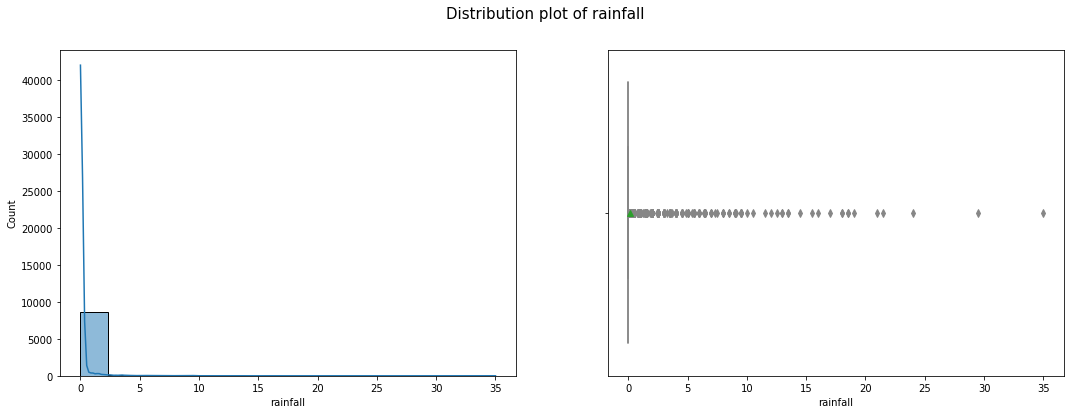

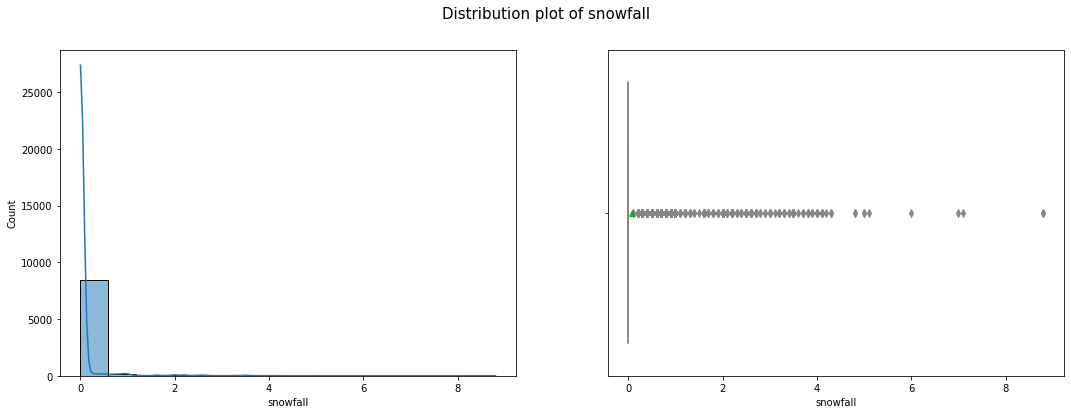

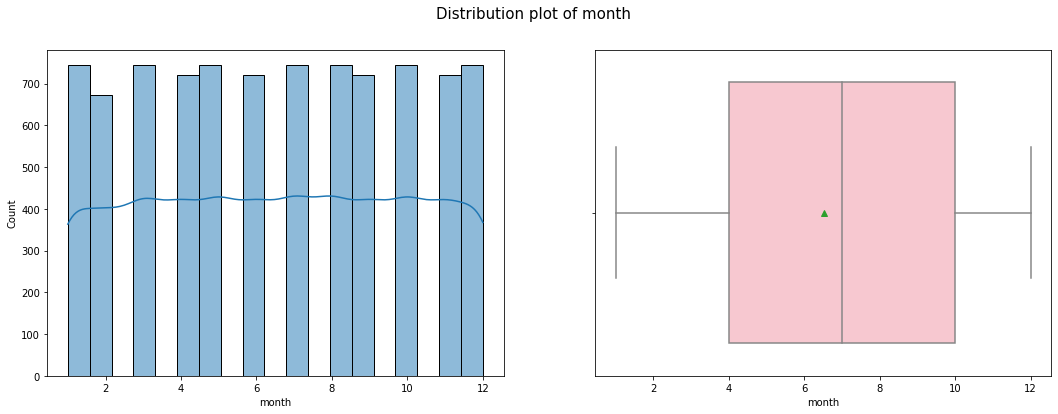

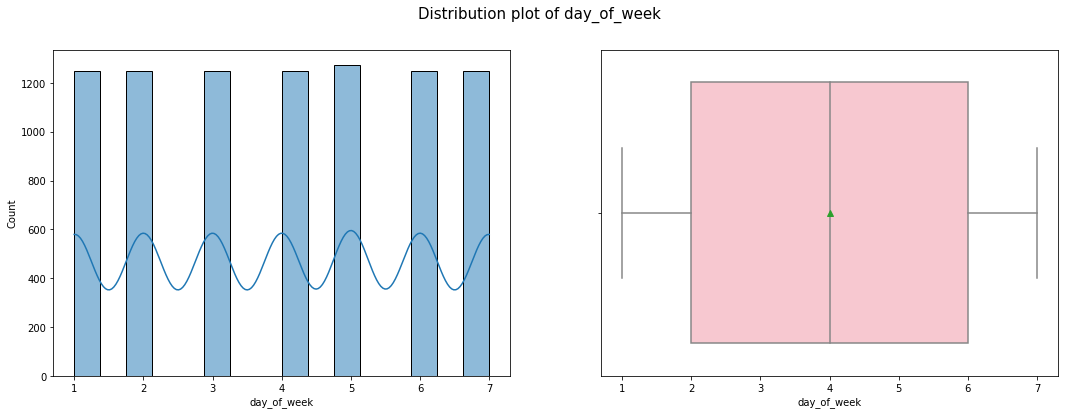

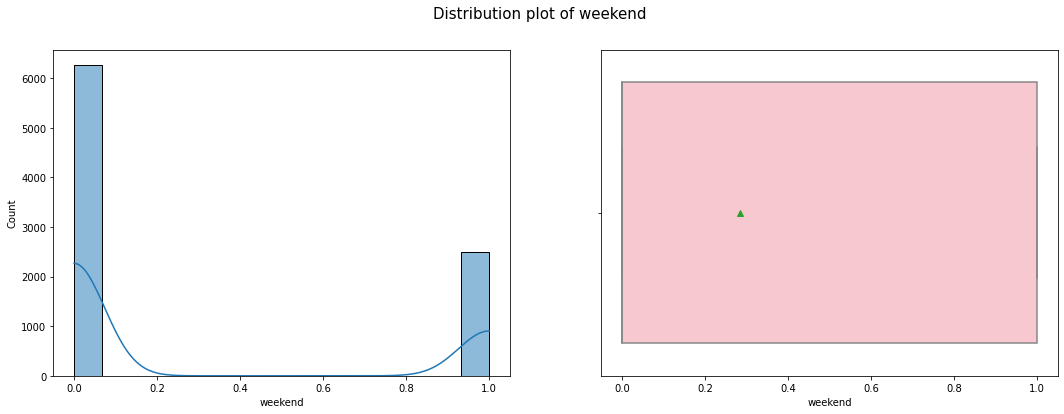

In [210]:
# Visualizing code of histogram plot & boxplot for each columns to know the data distribution
for col in data_2.describe().columns:
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
    sns.histplot(data_2[col], ax = axes[0],kde = True)
    sns.boxplot(data_2[col], ax = axes[1],orient='h',showmeans=True,color='pink')
    fig.suptitle("Distribution plot of "+ col, fontsize = 15)
    plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3 : Dependent variable with continuous variables (Bivariate)

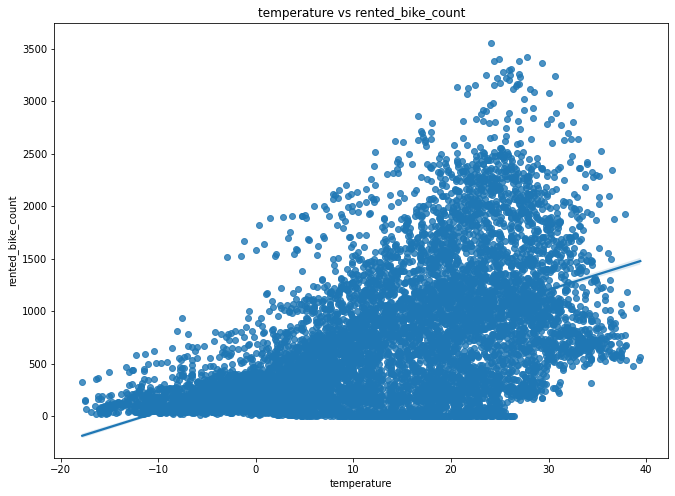

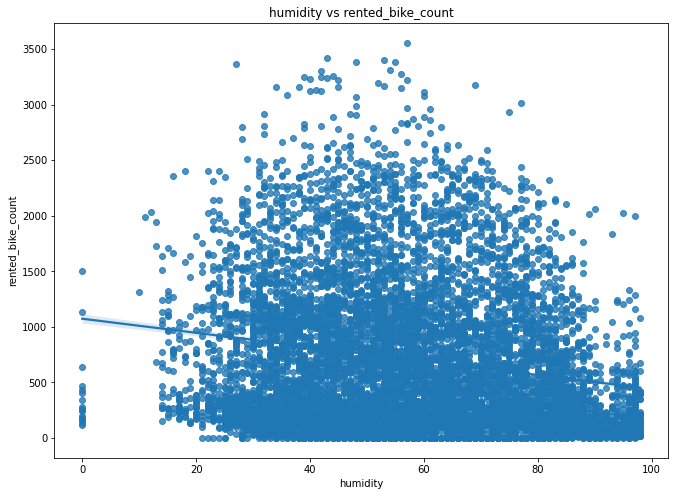

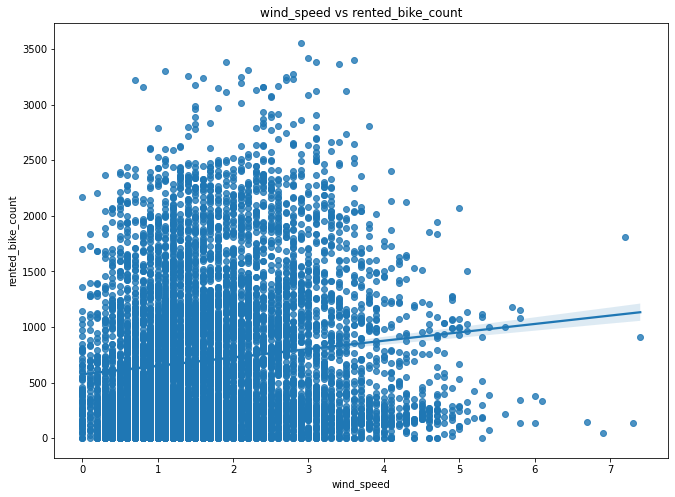

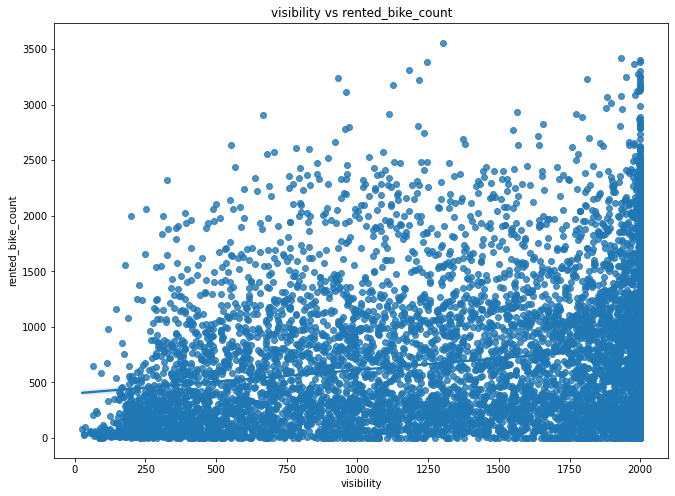

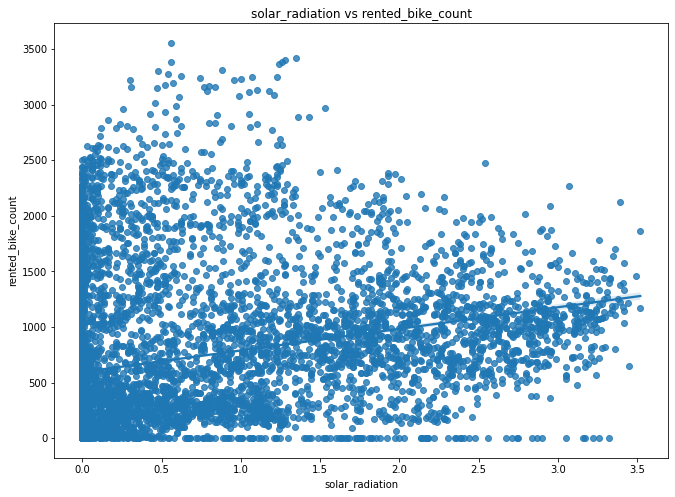

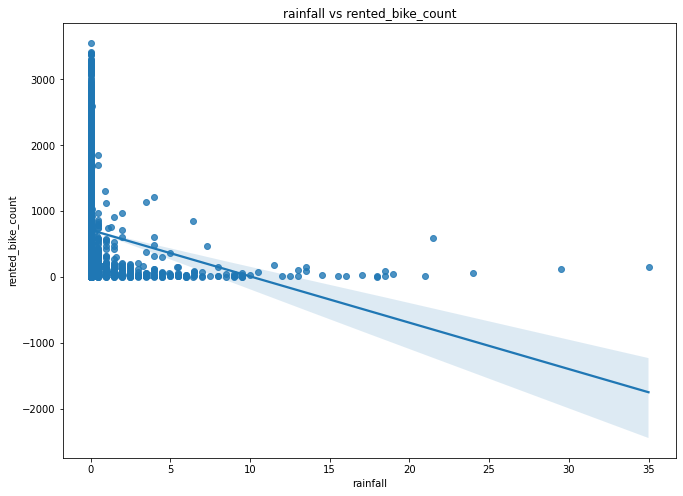

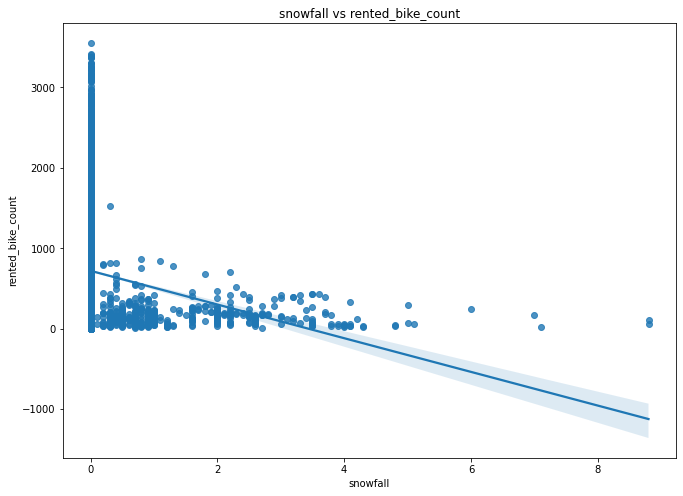

In [211]:
# Analyzing the relationship between the dependent variable and the continuous variables
for i in cont_var:
  plt.figure(figsize=(11,8))
  sns.regplot(x=i,y=dependent_variable[0],data=data_2)
  plt.xlabel(i)
  plt.ylabel(dependent_variable[0])
  plt.title(i+' vs '+ dependent_variable[0])
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 : Categorical variables with dependent variable (bivariate)

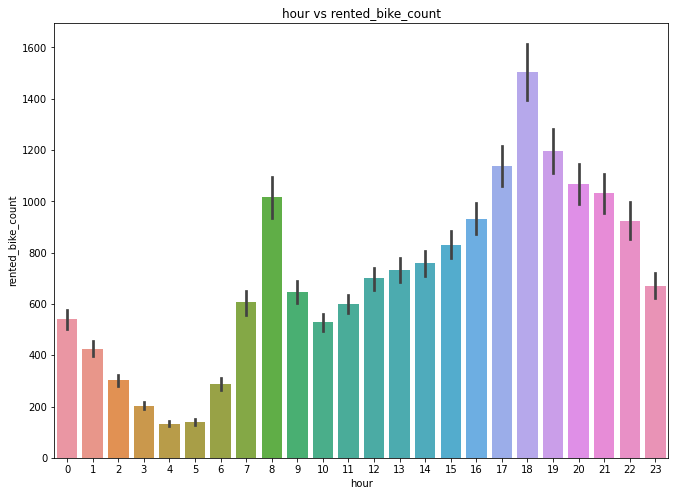

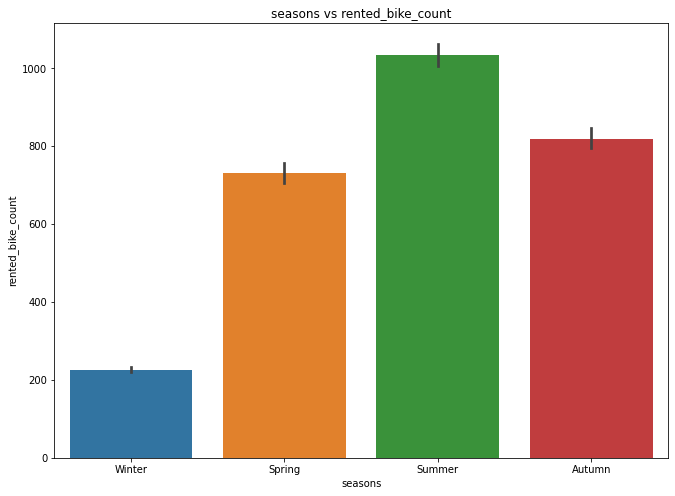

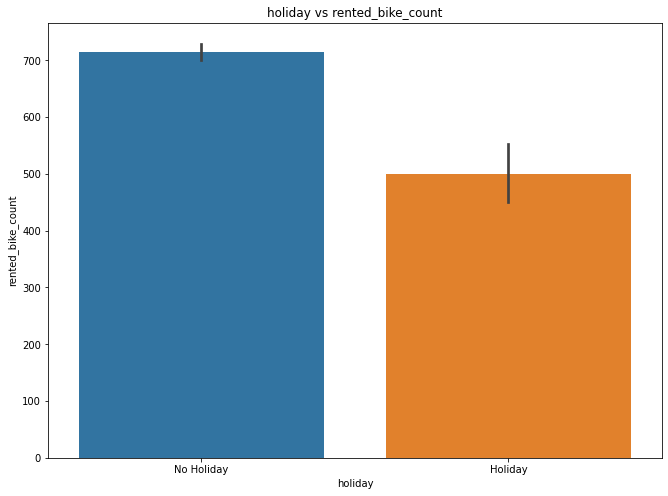

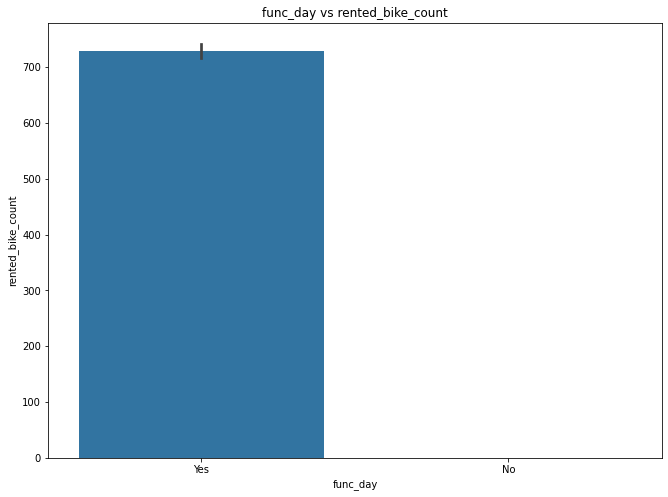

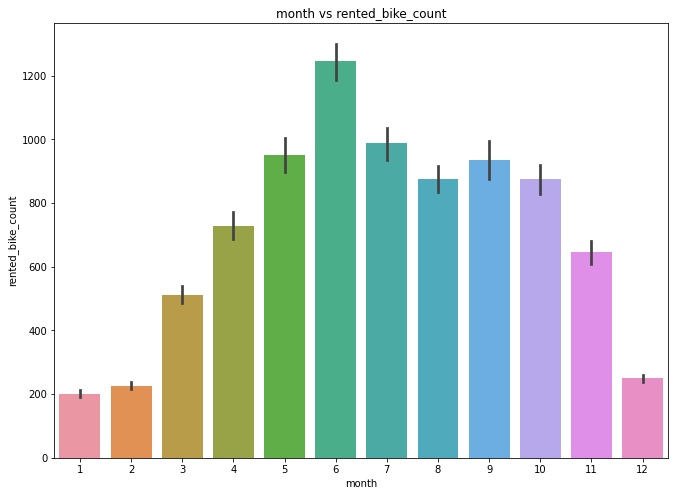

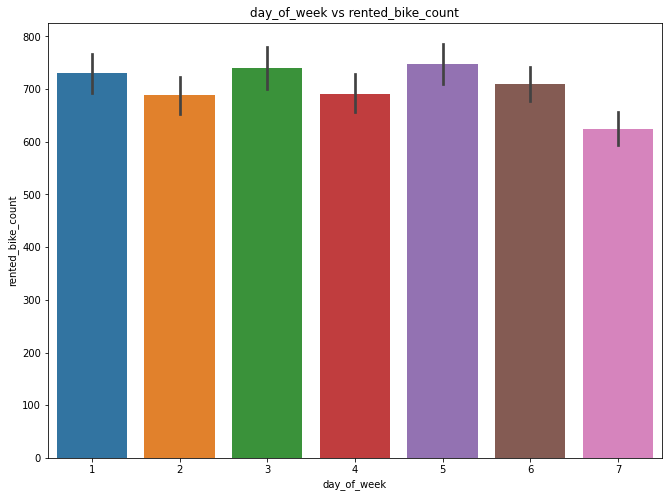

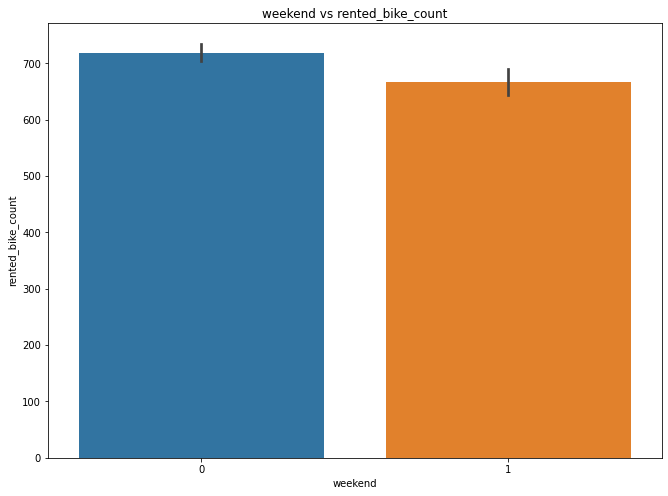

In [212]:
# Analyzing the relationship between the dependent variable and the categorical variables
for i in cat_var:
  plt.figure(figsize=(11,8))
  sns.barplot(x=i,y=dependent_variable[0],data=data_2)
  plt.xlabel(i)
  plt.ylabel(dependent_variable[0])
  plt.title(i+' vs '+ dependent_variable[0])
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

Text(0.5, 1.0, 'Average bike rented per hour')

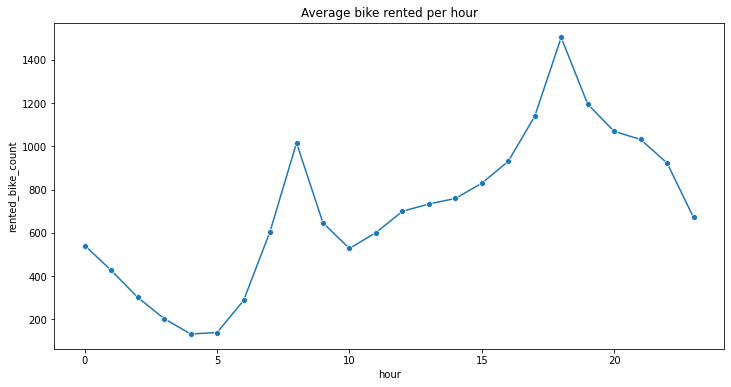

In [213]:
# Chart - 5 visualization code

#ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = data_2.groupby('hour')['rented_bike_count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_rent_hrs, marker='o')
plt.title('Average bike rented per hour')
# a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
# a.set_xticks(range(len(avg_rent_hrs)))
# a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

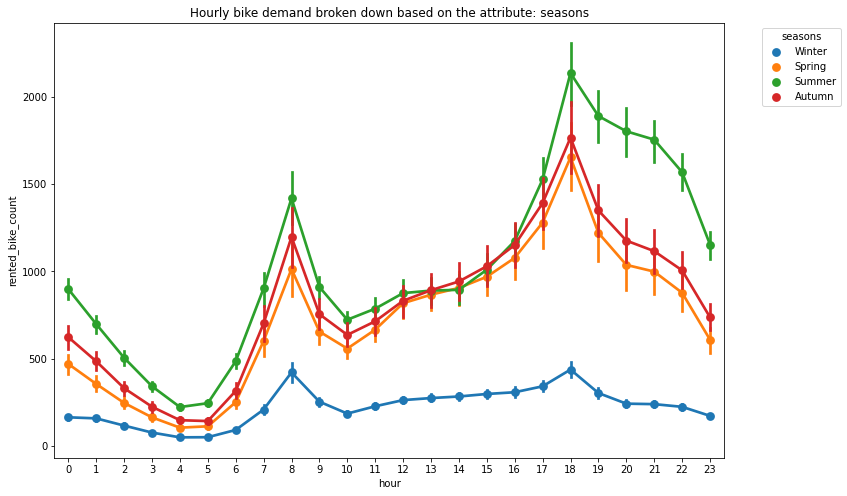

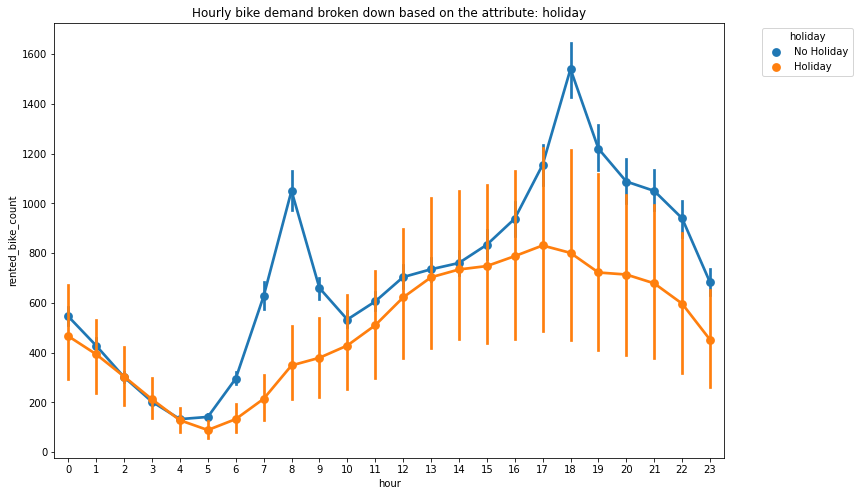

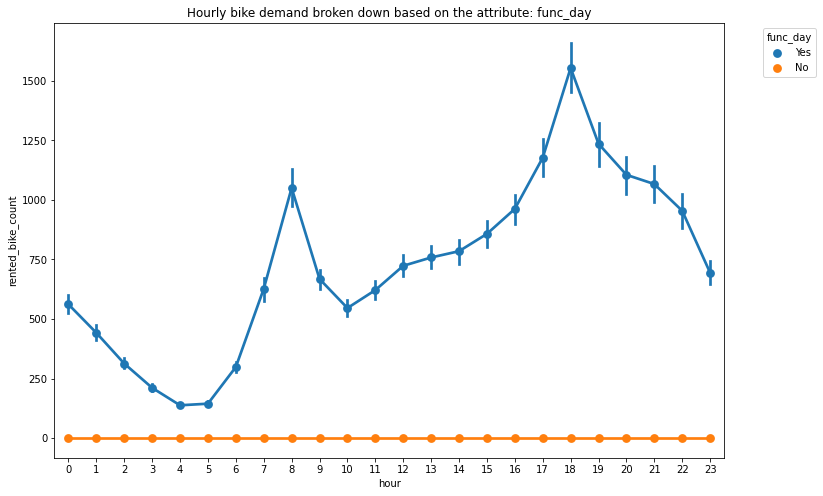

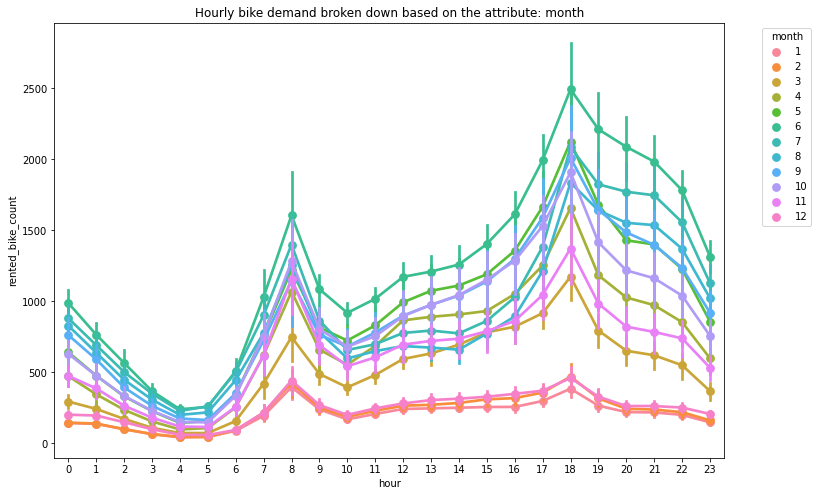

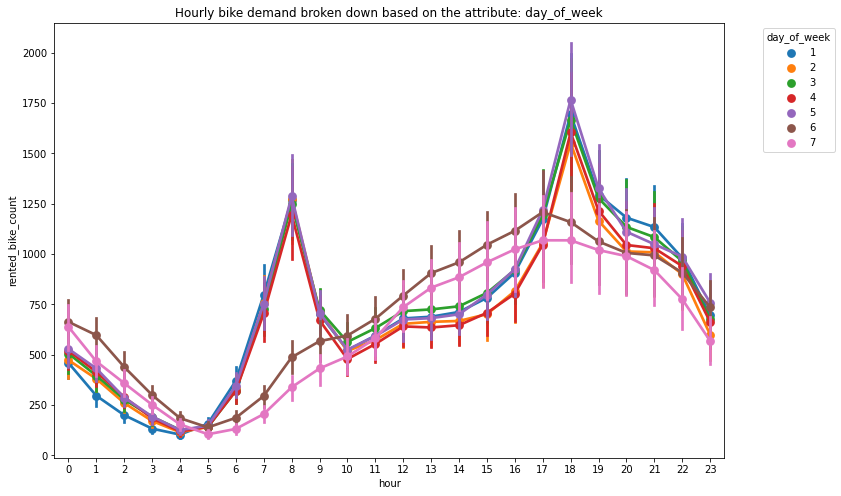

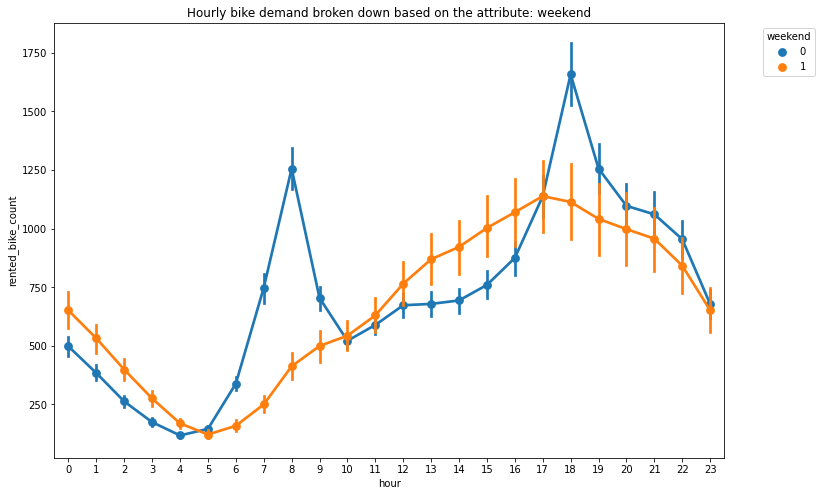

In [214]:
# Chart - 6 visualization code
for i in cat_var:
  if i == 'hour':
    continue
  else:
    fig, ax = plt.subplots(figsize=(12,8))
    sns.pointplot(data=data_2, x='hour', y='rented_bike_count', hue=i, ax=ax)
    plt.title('Hourly bike demand broken down based on the attribute: '+i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
    plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

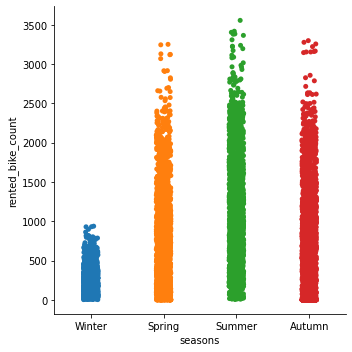

In [215]:
#plot for rented bike count seasonly
sns.catplot(x='seasons',y='rented_bike_count',data=data_2)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

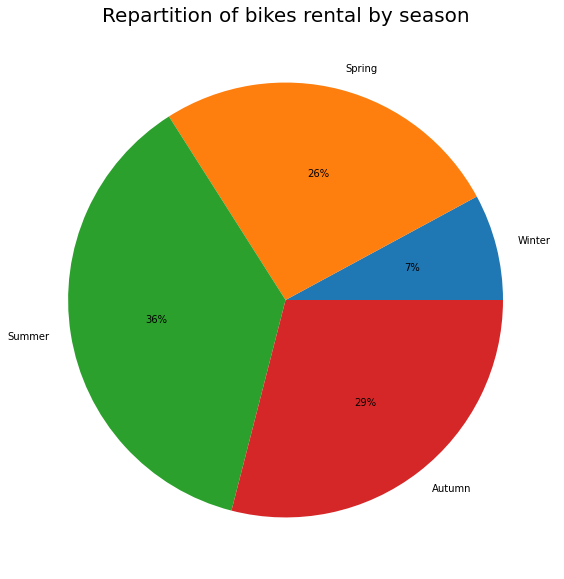

In [216]:
# Chart - 8 visualization code
Winter=data_2[data_2["seasons"]=='Winter'].sum()
Spring=data_2[data_2["seasons"]=='Spring'].sum()
Summer=data_2[data_2["seasons"]=='Summer'].sum()
Autumn=data_2[data_2["seasons"]=='Autumn'].sum()

BikeSeasons={"Winter":Winter["rented_bike_count"],"Spring":Spring["rented_bike_count"],"Summer":Summer["rented_bike_count"],"Autumn":Autumn["rented_bike_count"]}
plt.gcf().set_size_inches(10,10)
plt.pie(BikeSeasons.values(),labels=BikeSeasons.keys(), autopct='%1d%%');
plt.title("Repartition of bikes rental by season", fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [217]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [218]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [219]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [220]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

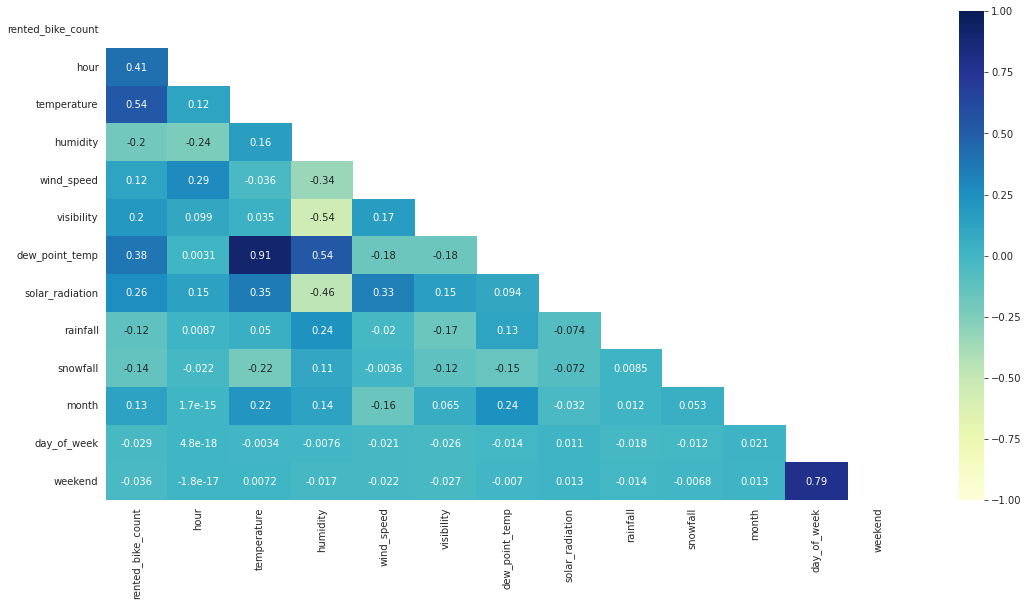

In [221]:
# Correlation Heatmap visualization code
corr = data_2.corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 9))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="YlGnBu")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

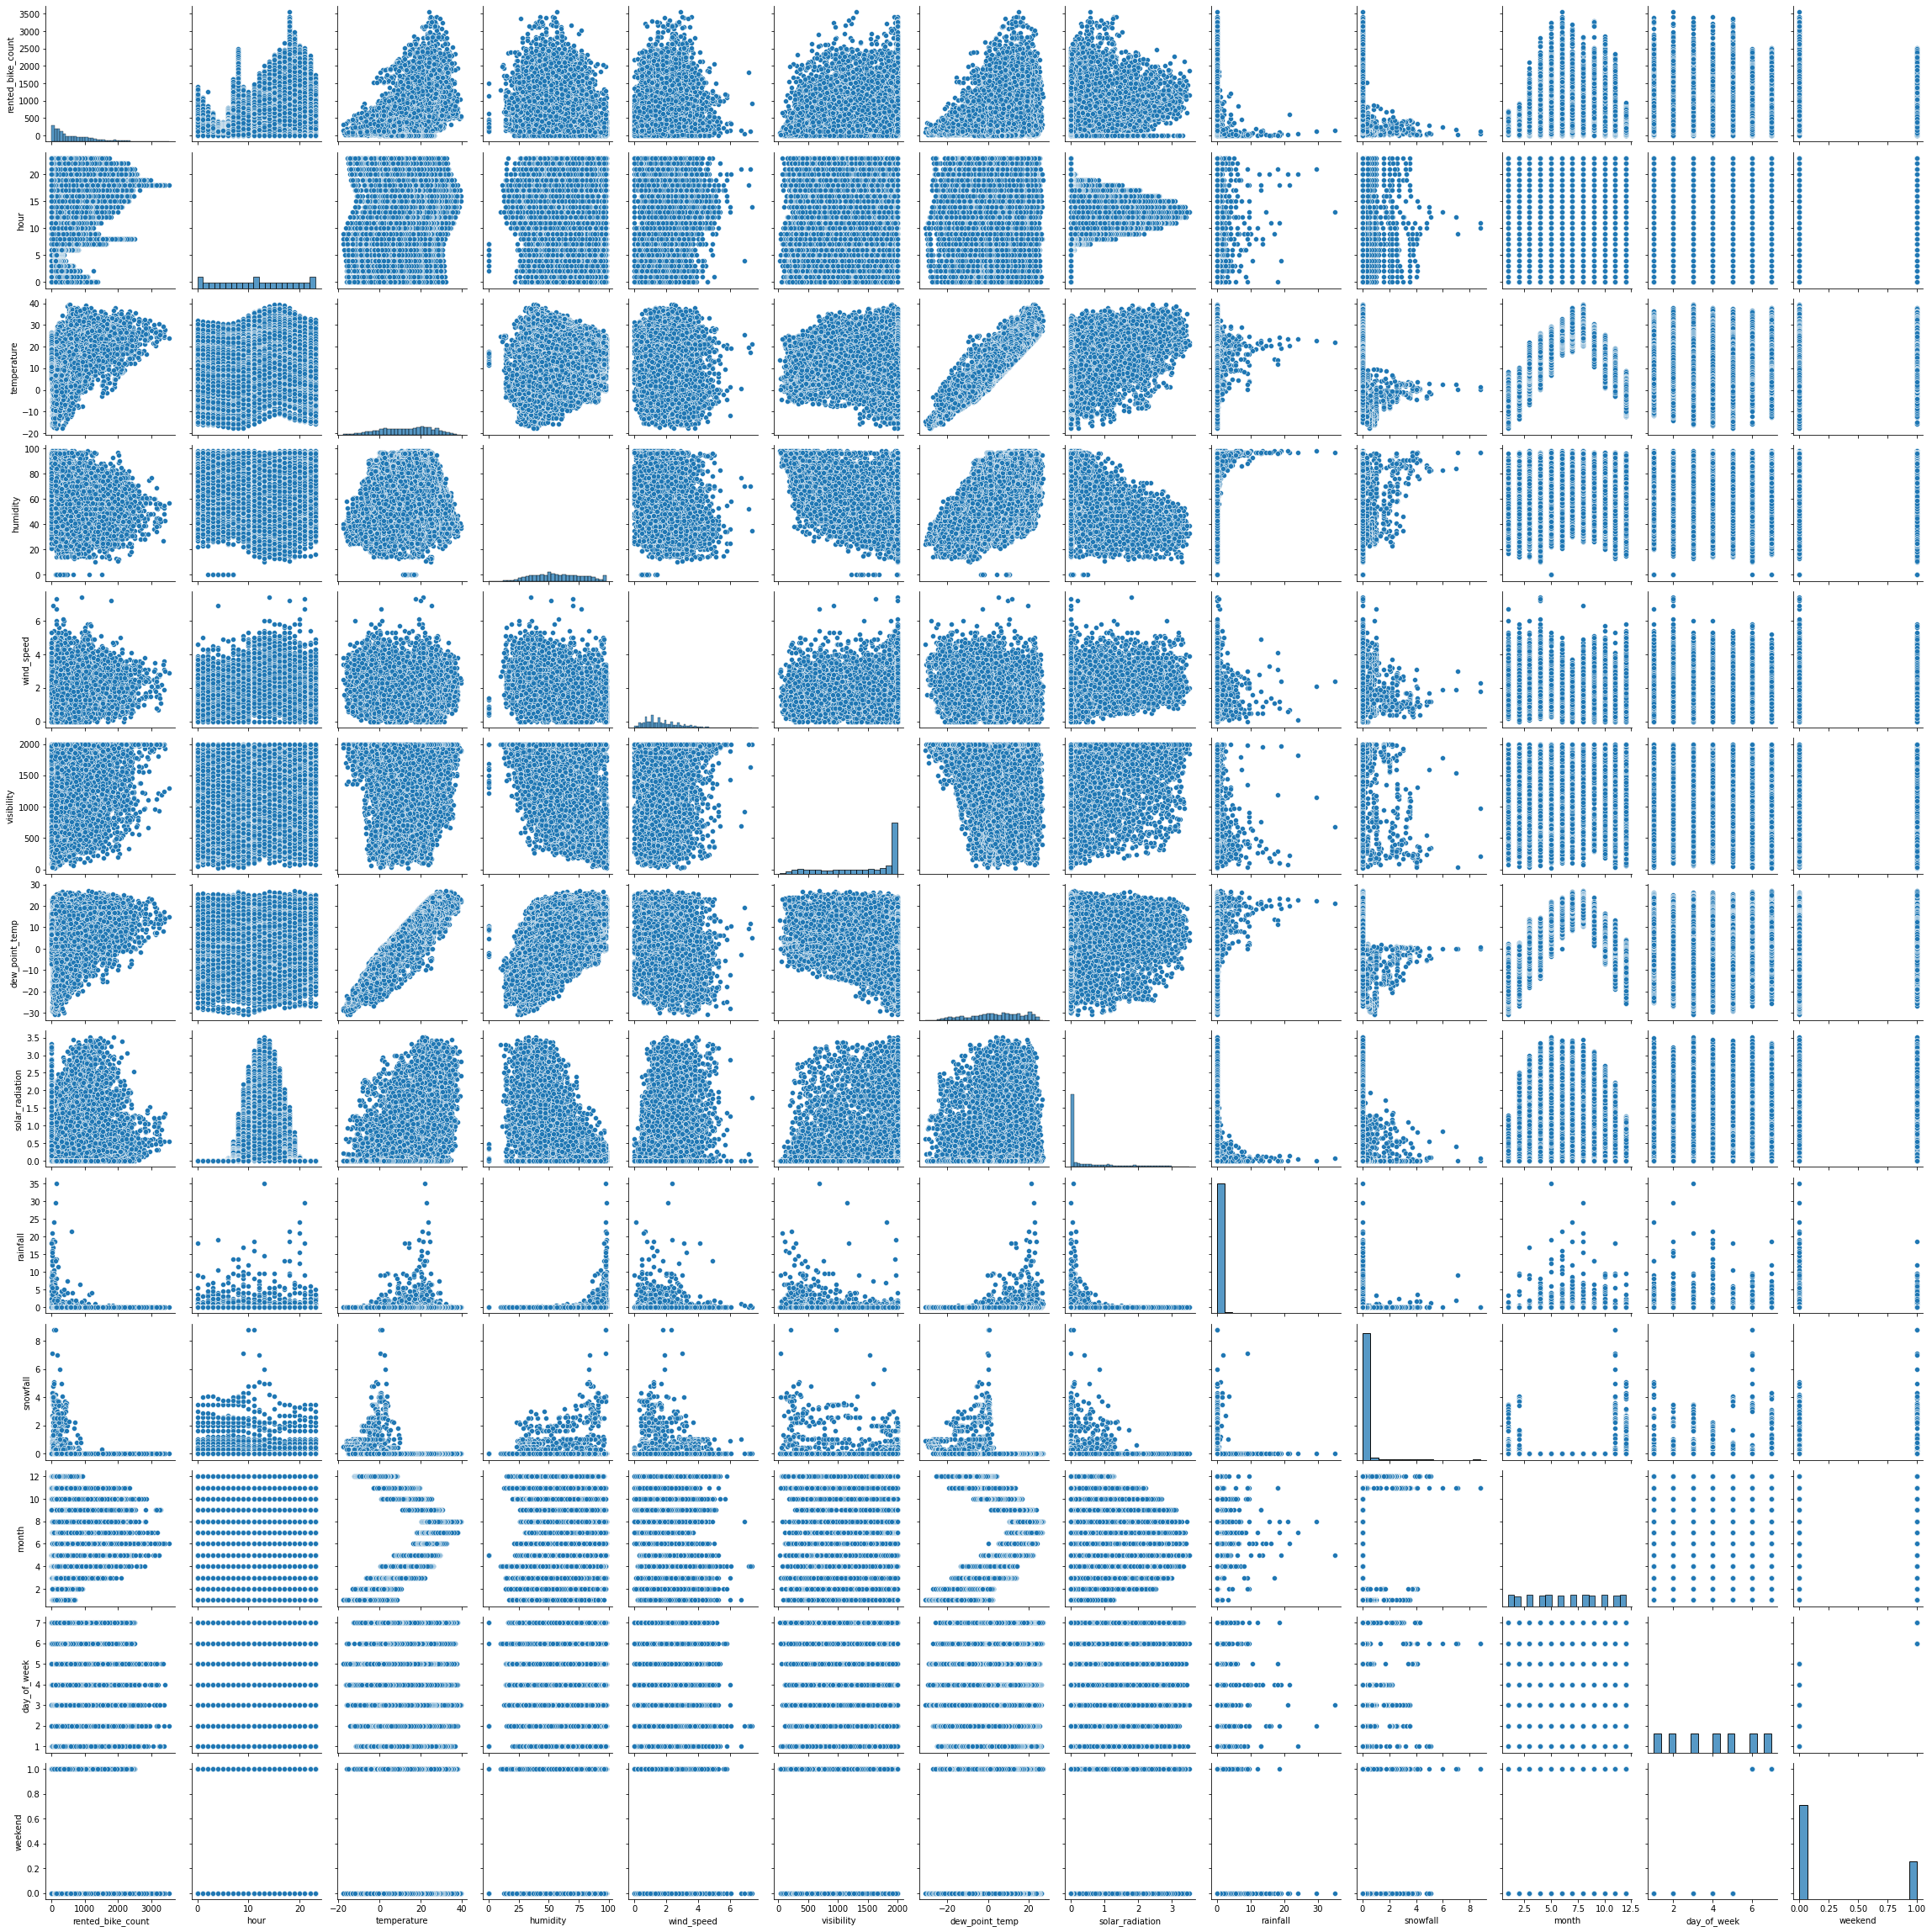

In [222]:
# Pair Plot
sns.pairplot(data_2)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [223]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [224]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [225]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [226]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [227]:
# # Removing outliers by Using IQR method:
q1, q3, median = data_2.rented_bike_count.quantile([0.25,0.75,0.5])
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
data_2['rented_bike_count'] = np.where(data_2['rented_bike_count'] > upper_limit, median,np.where(data_2['rented_bike_count'] < lower_limit,median,data_2['rented_bike_count']))

# # Removing outliers by Capping:
for col in ['wind_speed','solar_radiation','rainfall','snowfall']:
  upper_limit = data_2[col].quantile(0.99)
  data_2[col] = np.where(data_2[col] > upper_limit, upper_limit, data_2[col])

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [228]:
# Converting snowfall and rainfall to categorical attributes
data_2['snowfall'] = data_2['snowfall'].apply(lambda x: 1 if x>0 else 0)
data_2['rainfall'] = data_2['rainfall'].apply(lambda x: 1 if x>0 else 0)

In [229]:
# encoding the visibility column
data_2['visibility'] = data_2['visibility'].apply(lambda x: 0 if 0<=x<=399 else (1 if 400<=x<=999 else 2))

In [230]:
# encoding
data_2['func_day'] = np.where(data_2['func_day'] == 'Yes',1,0)
data_2['holiday'] = np.where(data_2['holiday'] == 'Holiday', 1,0)

In [231]:
# one hot encoding
data_2 = pd.get_dummies(data_2, columns = ['hour', 'visibility', 'month', 'day_of_week' ])

In [232]:
data_2.columns

Index(['date', 'rented_bike_count', 'temperature', 'humidity', 'wind_speed',
       'dew_point_temp', 'solar_radiation', 'rainfall', 'snowfall', 'seasons',
       'holiday', 'func_day', 'weekend', 'hour_0', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'visibility_0', 'visibility_1', 'visibility_2',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6', 'day_of_week_7'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

Text(0.5, 1.0, 'Temperature VS Dew point Temperature')

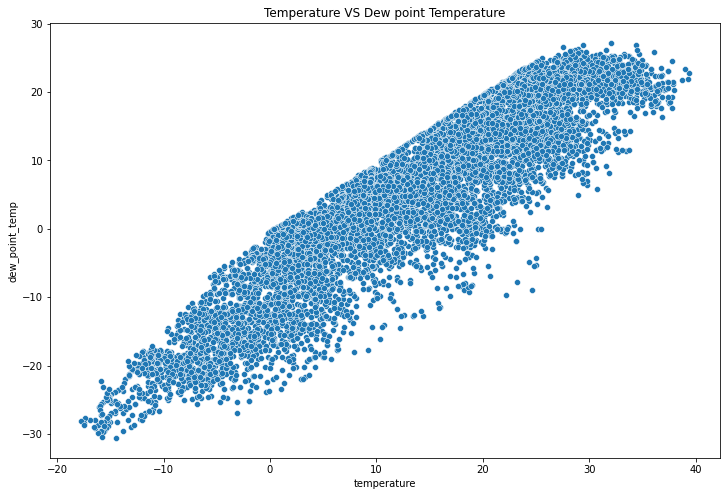

In [233]:
# Manipulate Features to minimize feature correlation and create new features

# We see that the temperature and dew temperature are highly correlated

# Scatter plot to visualize the relationship between
# temperature and dew point temperature
plt.figure(figsize=(12,8))
sns.scatterplot(x='temperature',y='dew_point_temp',data=data_2)
plt.xlabel('temperature')
plt.ylabel('dew_point_temp')
plt.title('Temperature VS Dew point Temperature')

In [234]:
# correlation
data_2[['temperature','dew_point_temp']].corr()

temperature  dew_point_temp
temperature        1.000000        0.912798
dew_point_temp     0.912798        1.000000

In [235]:
# Creating new temperature column with 50% of both temp
data_2['temp'] = 0.5*data_2['temperature'] + 0.5*data_2['dew_point_temp']

#### 2. Feature Selection

In [236]:
features = [i for i in data_2.columns if i not in ['rented_bike_count','date']]
features

['temperature',
 'humidity',
 'wind_speed',
 'dew_point_temp',
 'solar_radiation',
 'rainfall',
 'snowfall',
 'seasons',
 'holiday',
 'func_day',
 'weekend',
 'hour_0',
 'hour_1',
 'hour_2',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23',
 'visibility_0',
 'visibility_1',
 'visibility_2',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12',
 'day_of_week_1',
 'day_of_week_2',
 'day_of_week_3',
 'day_of_week_4',
 'day_of_week_5',
 'day_of_week_6',
 'day_of_week_7',
 'temp']

In [237]:
data_2[features]

temperature  humidity  wind_speed  dew_point_temp  solar_radiation  \
0            -5.2        37         2.2           -17.6              0.0   
1            -5.5        38         0.8           -17.6              0.0   
2            -6.0        39         1.0           -17.7              0.0   
3            -6.2        40         0.9           -17.6              0.0   
4            -6.0        36         2.3           -18.6              0.0   
...           ...       ...         ...             ...              ...   
8755          4.2        34         2.6           -10.3              0.0   
8756          3.4        37         2.3            -9.9              0.0   
8757          2.6        39         0.3            -9.9              0.0   
8758          2.1        41         1.0            -9.8              0.0   
8759          1.9        43         1.3            -9.3              0.0   

      rainfall  snowfall seasons  holiday  func_day  ...  month_11  month_12  \
0            0         0  Winter        0         1  ...         0         1   
1            0         0  Winter        0         1  ...         0         1   
2            0         0  Winter        0         1  ...         0         1   
3            0         0  Winter        0         1  ...         0         1   
4            0         0  Winter        0         1  ...         0         1   
...        ...       ...     ...      ...       ...  ...       ...       ...   
8755         0         0  Autumn        0         1  ...         1         0   
8756         0         0  Autumn        0         1  ...         1         0   
8757         0         0  Autumn        0         1  ...         1         0   
8758         0         0  Autumn        0         1  ...         1         0   
8759         0         0  Autumn        0         1  ...         1         0   

      day_of_week_1  day_of_week_2  day_of_week_3  day_of_week_4  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
8755              0              0              0              0   
8756              0              0              0              0   
8757              0              0              0              0   
8758              0              0              0              0   
8759              0              0              0              0   

      day_of_week_5  day_of_week_6  day_of_week_7   temp  
0                 1              0              0 -11.40  
1                 1              0              0 -11.55  
2                 1              0              0 -11.85  
3                 1              0              0 -11.90  
4                 1              0              0 -12.30  
...             ...            ...            ...    ...  
8755              1              0              0  -3.05  
8756              1              0              0  -3.25  
8757              1              0              0  -3.65  
8758              1              0              0  -3.85  
8759              1              0              0  -3.70  

[8760 rows x 58 columns]

In [238]:
#remove multicollinearity by using VIF technique
X = data_2[features]
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [240]:
continuous_variables = ['temperature', 'humidity', 'wind_speed', 'dew_point_temp', 'solar_radiation', 'temp']

In [241]:
continuous_feature_df = pd.DataFrame(data_2[continuous_variables])

In [242]:
continuous_feature_df

temperature  humidity  wind_speed  dew_point_temp  solar_radiation  \
0            -5.2        37         2.2           -17.6              0.0   
1            -5.5        38         0.8           -17.6              0.0   
2            -6.0        39         1.0           -17.7              0.0   
3            -6.2        40         0.9           -17.6              0.0   
4            -6.0        36         2.3           -18.6              0.0   
...           ...       ...         ...             ...              ...   
8755          4.2        34         2.6           -10.3              0.0   
8756          3.4        37         2.3            -9.9              0.0   
8757          2.6        39         0.3            -9.9              0.0   
8758          2.1        41         1.0            -9.8              0.0   
8759          1.9        43         1.3            -9.3              0.0   

       temp  
0    -11.40  
1    -11.55  
2    -11.85  
3    -11.90  
4    -12.30  
...     ...  
8755  -3.05  
8756  -3.25  
8757  -3.65  
8758  -3.85  
8759  -3.70  

[8760 rows x 6 columns]

In [243]:
calc_vif(data_2[[i for i in continuous_feature_df]])

variables       VIF
0      temperature       inf
1         humidity  3.761605
2       wind_speed  4.592089
3   dew_point_temp       inf
4  solar_radiation  2.628342
5             temp       inf

In [244]:
calc_vif(data_2[[i for i in continuous_feature_df if i not in ['dew_point_temp','temperature']]])

variables       VIF
0         humidity  3.585121
1       wind_speed  3.543975
2  solar_radiation  1.973494
3             temp  2.031251

In [245]:
# dropping data, weekend, temperature and dew_point_temperature
data_2.drop(['date','weekend', 'dew_point_temp', 'temperature','seasons'],axis=1, inplace=True)

In [246]:
data_2.head()

rented_bike_count  humidity  wind_speed  solar_radiation  rainfall  \
0              254.0        37         2.2              0.0         0   
1              204.0        38         0.8              0.0         0   
2              173.0        39         1.0              0.0         0   
3              107.0        40         0.9              0.0         0   
4               78.0        36         2.3              0.0         0   

   snowfall  holiday  func_day  hour_0  hour_1  ...  month_11  month_12  \
0         0        0         1       1       0  ...         0         1   
1         0        0         1       0       1  ...         0         1   
2         0        0         1       0       0  ...         0         1   
3         0        0         1       0       0  ...         0         1   
4         0        0         1       0       0  ...         0         1   

   day_of_week_1  day_of_week_2  day_of_week_3  day_of_week_4  day_of_week_5  \
0              0              0              0              0              1   
1              0              0              0              0              1   
2              0              0              0              0              1   
3              0              0              0              0              1   
4              0              0              0              0              1   

   day_of_week_6  day_of_week_7   temp  
0              0              0 -11.40  
1              0              0 -11.55  
2              0              0 -11.85  
3              0              0 -11.90  
4              0              0 -12.30  

[5 rows x 55 columns]

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

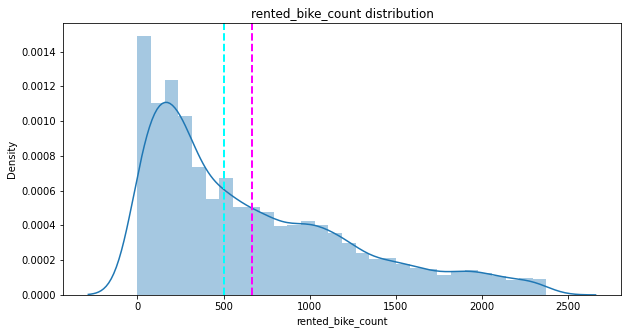

In [247]:
# Transform Your data
# visualizing the distribution of the dependent variable - rental bike count
plt.figure(figsize=(10,5))
sns.distplot(data_2[dependent_variable])
plt.xlabel(dependent_variable[0])
plt.title(dependent_variable[0]+' distribution')
plt.axvline(data_2[dependent_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(data_2[dependent_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)

In [248]:
# skew of the dependent variable
data_2[dependent_variable].skew()

rented_bike_count    0.98347
dtype: float64

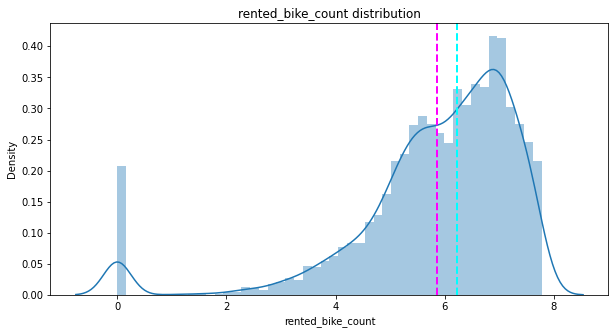

In [249]:
# visualizing the distribution of dependent variable after log transformation
plt.figure(figsize=(10,5))
sns.distplot(np.log1p(data_2[dependent_variable]))
plt.xlabel(dependent_variable[0])
plt.title(dependent_variable[0]+' distribution')
plt.axvline(np.log1p(data_2['rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.log1p(data_2['rented_bike_count']).median(), color='cyan', linestyle='dashed', linewidth=2)

In [250]:
# skew of the dependent variable after log transformation
np.log1p(data_2[dependent_variable]).skew()

rented_bike_count   -1.895
dtype: float64

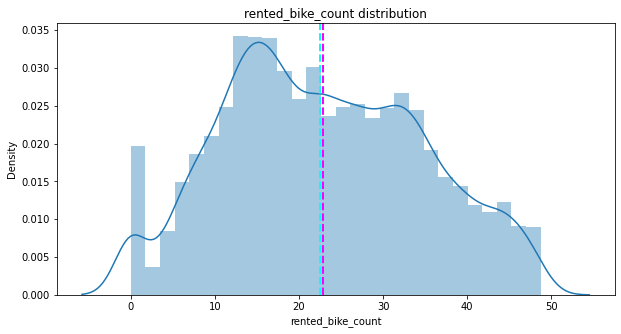

In [251]:
# visualizing the distribution of dependent variable after sqrt transformation
plt.figure(figsize=(10,5))
sns.distplot(np.sqrt(data_2[dependent_variable]))
plt.xlabel(dependent_variable[0])
plt.title(dependent_variable[0]+' distribution')
plt.axvline(np.sqrt(data_2['rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.sqrt(data_2['rented_bike_count']).median(), color='cyan', linestyle='dashed', linewidth=2)

In [252]:
# skew of the dependent variable after sqrt transformation
np.sqrt(data_2[dependent_variable]).skew()

rented_bike_count    0.153124
dtype: float64

In [253]:
# Defining dependent and independent variables
X = data_2.drop('rented_bike_count',axis=1)
y = np.sqrt(data_2[dependent_variable])

In [254]:
X

humidity  wind_speed  solar_radiation  rainfall  snowfall  holiday  \
0           37         2.2              0.0         0         0        0   
1           38         0.8              0.0         0         0        0   
2           39         1.0              0.0         0         0        0   
3           40         0.9              0.0         0         0        0   
4           36         2.3              0.0         0         0        0   
...        ...         ...              ...       ...       ...      ...   
8755        34         2.6              0.0         0         0        0   
8756        37         2.3              0.0         0         0        0   
8757        39         0.3              0.0         0         0        0   
8758        41         1.0              0.0         0         0        0   
8759        43         1.3              0.0         0         0        0   

      func_day  hour_0  hour_1  hour_2  ...  month_11  month_12  \
0            1       1       0       0  ...         0         1   
1            1       0       1       0  ...         0         1   
2            1       0       0       1  ...         0         1   
3            1       0       0       0  ...         0         1   
4            1       0       0       0  ...         0         1   
...        ...     ...     ...     ...  ...       ...       ...   
8755         1       0       0       0  ...         1         0   
8756         1       0       0       0  ...         1         0   
8757         1       0       0       0  ...         1         0   
8758         1       0       0       0  ...         1         0   
8759         1       0       0       0  ...         1         0   

      day_of_week_1  day_of_week_2  day_of_week_3  day_of_week_4  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
8755              0              0              0              0   
8756              0              0              0              0   
8757              0              0              0              0   
8758              0              0              0              0   
8759              0              0              0              0   

      day_of_week_5  day_of_week_6  day_of_week_7   temp  
0                 1              0              0 -11.40  
1                 1              0              0 -11.55  
2                 1              0              0 -11.85  
3                 1              0              0 -11.90  
4                 1              0              0 -12.30  
...             ...            ...            ...    ...  
8755              1              0              0  -3.05  
8756              1              0              0  -3.25  
8757              1              0              0  -3.65  
8758              1              0              0  -3.85  
8759              1              0              0  -3.70  

[8760 rows x 54 columns]

In [255]:
features

['temperature',
 'humidity',
 'wind_speed',
 'dew_point_temp',
 'solar_radiation',
 'rainfall',
 'snowfall',
 'seasons',
 'holiday',
 'func_day',
 'weekend',
 'hour_0',
 'hour_1',
 'hour_2',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23',
 'visibility_0',
 'visibility_1',
 'visibility_2',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12',
 'day_of_week_1',
 'day_of_week_2',
 'day_of_week_3',
 'day_of_week_4',
 'day_of_week_5',
 'day_of_week_6',
 'day_of_week_7',
 'temp']

### 6. Data Scaling

In [256]:
features = [i for i in data_2.columns if i not in ['rented_bike_count']]

In [257]:
# Scaling your data
scaler = StandardScaler()
X = scaler.fit_transform(data_2[features])

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 0)

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***